# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you may be using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepen your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells, code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [14]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

import pandas as pd

# Loading NASA's Airfoil Self-Noise Data Set from
# https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat'
# !curl {data_url}
column_names = ['Frequency (Hz)','Angle of attack (degrees)','Chord length (m)','Free-stream velocity (m/s)','Suction side displacement thickness (m)','Scaled sound pressure level (db)']
nasa_data = pd.read_csv(data_url, sep='\t', names=column_names)
nasa_data.head()


,Frequency (Hz),Angle of attack (degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (db)
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [15]:
nasa_data.describe()

,Frequency (Hz),Angle of attack (degrees),Chord length (m),Free-stream velocity (m/s),Suction side displacement thickness (m),Scaled sound pressure level (db)
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [16]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

# more syntax
# https://colab.research.google.com/notebooks/io.ipynb#scrollTo=vz-jH8T_Uk2c

from google.colab import files

# for reproducibility, I'm using this dataset
# https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+%28North+Jutland%2C+Denmark%29
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 3D_spatial_network.txt to 3D_spatial_network (1).txt
User uploaded file "3D_spatial_network.txt" with length 20673913 bytes


In [17]:
# Construct the column names from the provided .names file
import re
dataset_html = !curl https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+%28North+Jutland%2C+Denmark%29
p = '\d. ([A-Z_]+): '
column_names = [ re.search(p, line).group(1).title()
  for line in dataset_html if re.search(p, line) ]
print(column_names)

['Osm_Id', 'Longitude', 'Latitude', 'Altitude']


In [18]:
import pandas as pd
danish_file = '3D_spatial_network.txt'
danish_roads = pd.read_csv(danish_file, names=column_names)
danish_roads.head()

,Osm_Id,Longitude,Latitude,Altitude
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [20]:
danish_roads.describe()

,Osm_Id,Longitude,Latitude,Altitude
count,4.348740e+05,434874.000000,434874.000000,434874.000000
mean,9.786998e+07,9.731836,57.083758,22.185405
std,3.775233e+07,0.627349,0.289479,18.617989
min,4.482444e+06,8.146126,56.582486,-8.608184
25%,8.267897e+07,9.337649,56.846049,7.028053
50%,1.019797e+08,9.887195,57.042498,17.574678
75%,1.259547e+08,10.172359,57.308669,31.810224
max,1.577424e+08,11.199326,57.750511,134.441947


In [22]:
peak = danish_roads['Altitude'].max()
print('The highest point in Denmark is Ejer Bavnehøj at 170.35 m.')
print('The highest road in this dataset of Danish roads is {} m'.format(peak))

The highest point in Denmark is Ejer Bavnehøj at 170.35 m.
The highest road in this dataset of Danish roads is 134.441946906076 m


## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [23]:
# Lets look at the number of unique values in each column to look for columns
# that are suitable for a crosstab
print("Number of unique values in the Danish Roads data")
for column in danish_roads.columns:
  print(column,'=',danish_roads[column].nunique())  

print("\nNumber of unique values in the Nasa Wind Tunnel data")
for column in nasa_data.columns:
  print(column,'=',nasa_data[column].nunique())

Number of unique values in the Danish Roads data
Osm_Id = 57329
Longitude = 384279
Latitude = 380142
Altitude = 434874

Number of unique values in the Nasa Wind Tunnel data
Frequency (Hz) = 21
Angle of attack (degrees) = 27
Chord length (m) = 6
Free-stream velocity (m/s) = 4
Suction side displacement thickness (m) = 105
Scaled sound pressure level (db) = 1456


In [29]:
pd.crosstab(nasa_data['Chord length (m)'],nasa_data['Frequency (Hz)'])
# It appears there were more samples in the middle range of frequncies,
# and also samples are roughly well distributed across chord length.

Frequency (Hz),200,250,315,400,500,630,800,1000,1250,1600,2000,2500,3150,4000,5000,6300,8000,10000,12500,16000,20000
Chord length (m),,,,,,,,,,,,,,,,,,,,,
0.0254,7,9,10,11,13,14,14,15,15,17,19,20,20,20,20,17,12,9,6,6,4
0.0508,8,8,8,11,11,11,16,17,17,18,18,18,18,18,12,10,7,6,5,0,0
0.1016,8,8,9,10,11,19,20,20,20,20,20,18,17,16,15,15,8,7,2,0,0
0.1524,6,7,10,12,16,17,18,18,18,18,18,18,18,18,18,18,9,7,4,3,0
0.2286,4,6,12,16,17,17,17,17,18,18,18,18,18,18,18,18,6,4,2,2,2
0.3048,2,4,7,9,10,10,12,12,12,12,12,12,12,12,12,11,10,9,6,2,0


## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

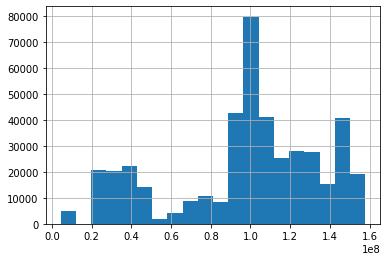

In [44]:
# Your Code Here

# These are the ID numbers of road segments
df['Osm_Id'].hist(bins=20);

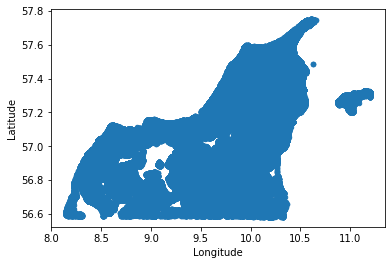

In [45]:
# a scatter of latitude and longitude can simulate a map
df.plot.scatter(x='Longitude', y='Latitude');
# hmm, looks like it's missing my favorite town, Aarhus, which is just a little south of the border here.

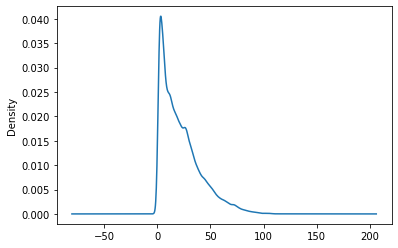

In [47]:
# Denmark is a very flat country, with a max altitude of 559 feet
# A density plot of road elevations can estimate the histogram of elevation across
# NW Denmark
df['Altitude'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


In [30]:
# The NASA data is more suitable to cross tabs, because there are columns
# with 4, 6, 21, and 27 denominations.
pd.crosstab(nasa_data['Suction side displacement thickness (m)'],nasa_data['Angle of attack (degrees)'])
# Ok, I really didn't expect a sparse matrix at all here. That is interesting.

Angle of attack (degrees),0.0,1.5,2.0,2.7,3.0,3.3,4.0,4.2,4.8,5.3,5.4,6.7,7.2,7.3,8.4,8.9,9.5,9.9,11.2,12.3,12.6,12.7,15.4,15.6,17.4,19.7,22.2
Suction side displacement thickness (m),,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000401,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.000412,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.000428,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.000439,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0.000740,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.041876,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0
0.043726,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0
0.048316,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0


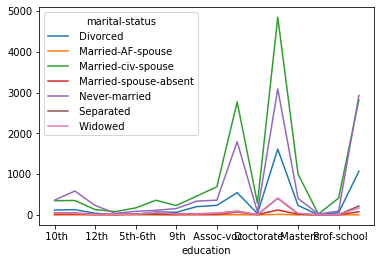

In [58]:
crosstab = pd.crosstab(adult_df['education'],adult_df['marital-status'])
crosstab.plot();

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

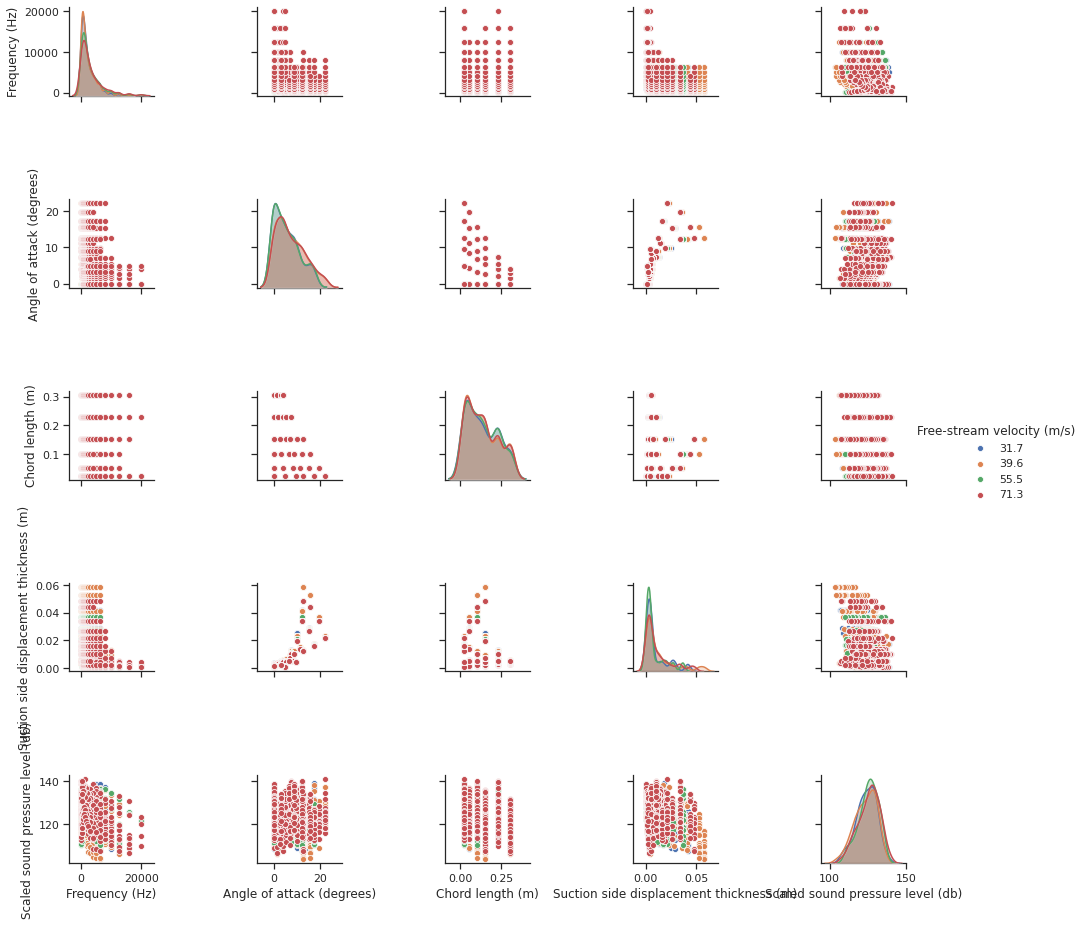

In [35]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(nasa_data, diag_kind="kde", hue="Free-stream velocity (m/s)")
# there's definitely some physics to be extracted from this data.